In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv("Sample.csv")  
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,Email,Name,Gender,10th board,10th marks,12th board,12th marks,Stream,Cgpa,Internships(Y/N),Training(Y/N),Backlog in 5th sem,Innovative Project(Y/N),Communication level,Technical Course(Y/N),Placement(Y/N)?
0,payal_roy79@gmail.com,Payal Roy,Female,State Board,96.7,CBSE,70.2,Mechanical Engineering,7.37,No,Yes,No,No,3,Yes,Not Placed
1,shreyoshi_dey13@gmail.com,Shreyoshi Dey,Female,WBBSE,96.2,WBCHSE,90.6,Electronics and Communication Engineering,9.35,No,No,No,Yes,4,No,Not Placed
2,rohan_nandi12@gmail.com,Rohan Nandi,Male,State Board,97.5,CBSE,69.6,Information Technology,7.84,No,Yes,No,Yes,3,Yes,Placed
3,smita_agarwal90@gmail.com,Smita Agarwal,Female,CBSE,96.9,Other state Board,77.6,Computer Science in AIML,7.87,Yes,No,Yes,Yes,2,Yes,Not Placed
4,samaira_singhania95@gmail.com,Samaira Singhania,Female,ICSE,99.1,CBSE,62.8,Computer Science and Engineering,9.26,Yes,Yes,No,Yes,1,Yes,Not Placed


In [5]:
numeric_cols = df.select_dtypes(include=[np.number])

In [6]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [8]:
print("\nOutliers detected using IQR:")
for col in numeric_cols.columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} → {len(outliers)} outliers")
    if not outliers.empty:
        outliers[[col]]


Outliers detected using IQR:
10th marks → 3 outliers
12th marks → 0 outliers
Cgpa → 2 outliers
Communication level → 0 outliers


In [9]:
z_scores = np.abs(stats.zscore(numeric_cols))
outlier_rows = (z_scores > 3).any(axis=1)
outliers_zscore = df[outlier_rows]

In [11]:
print("\nOutliers detected using Z-score method:")
outliers_zscore


Outliers detected using Z-score method:


,Email,Name,Gender,10th board,10th marks,12th board,12th marks,Stream,Cgpa,Internships(Y/N),Training(Y/N),Backlog in 5th sem,Innovative Project(Y/N),Communication level,Technical Course(Y/N),Placement(Y/N)?
118,yjanardhanreddy111@gmail.com,Yeddula Janardhan Reddy,Male,State Board,93.0,Other state Board,92.00,Computer Science and Engineering,90.0,Yes,No,No,No,3,Yes,Not Placed
166,dhrubosh@gmail.com,Dhrubojyoti Saha,Male,WBBSE,32.0,WBCHSE,59.83,Information Technology,9.2,No,No,No,Yes,2,Yes,Not Placed
174,sunilgarai210@gmail.com,Sunil Garai,Male,WBBSE,47.0,WBCHSE,88.00,Electrical Engineering,7.9,Yes,Yes,Yes,Yes,3,Yes,Placed
387,utpalmajee91@gmail.com,UTPAL MAJEE,Male,CBSE,45.0,WBCHSE,45.00,Computer Science and Engineering,5.5,No,Yes,No,Yes,3,Yes,Placed


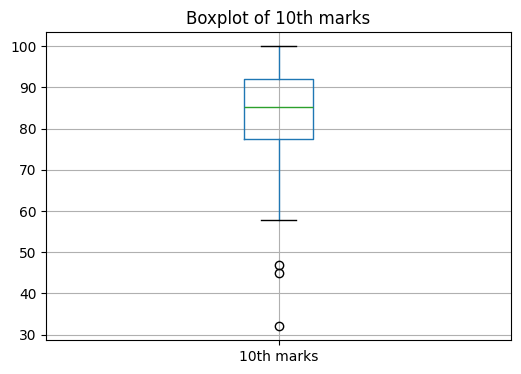

In [ ]:
for col in numeric_cols.columns:
    plt.figure(figsize=(6,4))
    df.boxplot([col])
    plt.title(f"Boxplot of {col}")
    plt.show()